# ***Classification***

In [132]:
# Importing required libraries
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline 

In [133]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [134]:
# Load Data sets , both train and test
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [135]:
# Get dim of data sets
print("Shape of Train Data : ", train_data.shape)
print("Shape of Test Data : ", test_data.shape)

Shape of Train Data :  (31647, 18)
Shape of Test Data :  (13564, 17)


In [136]:
# Columns 
print('Columns name of train data set : \n',train_data.columns)

print('\nColumns name of test data set : \n',test_data.columns)

Columns name of train data set : 
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

Columns name of test data set : 
 Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [137]:
# First 5 values in train data set
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [138]:
# First 5 values in test data set
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [139]:
# statistical summary of our train data set
train_data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [140]:
# data types of columns
train_data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [141]:
train_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Columns: 18 entries, ID to subscribed
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [142]:
test_data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Columns: 17 entries, ID to poutcome
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


Let's look at the distribution of our target variable, i.e. subscribed. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [143]:
train_data['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Out of 31647 only 3715 are subscribed people in our data set and 27932 are not our subscribers.

In [144]:
# % distribution i. e. proportion 
train_data['subscribed'].value_counts()/len(train_data['subscribed'])


no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

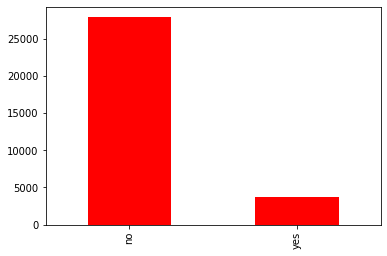

In [145]:
# visualize using bar plot
train_data['subscribed'].value_counts().plot.bar(color = 'red')

So, 3715 users out of total 31647 have subscribed which is around 12%.

Let's now explore the variables to have a better understanding of the datase

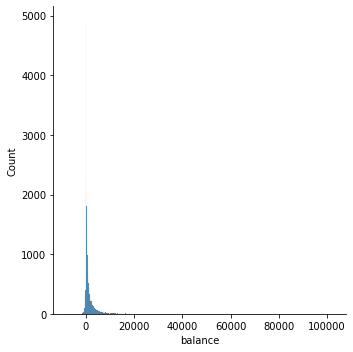

In [146]:
sns.displot(train_data['balance'])

In [147]:
train_data['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

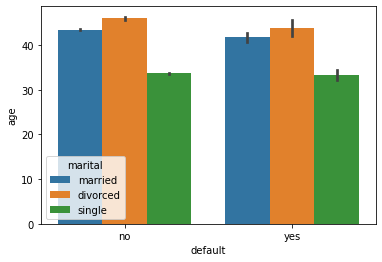

In [148]:
sns.barplot(train_data['default'], train_data['age'], hue=train_data['marital'])

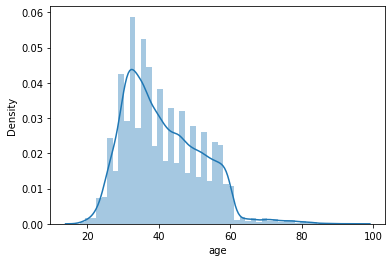

In [149]:
# Age
sns.distplot(train_data['age'])

We can infer that most of the clients fall in the age group between 20-60.

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


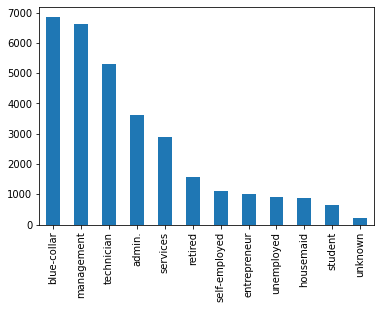

In [150]:
# Types of jobs 
print(train_data['job'].value_counts())

train_data['job'].value_counts().plot(kind='bar')

We see that most of the clients belongs to blue-collar job and the students are least in number as students generally do not take a term deposit.

no     31062
yes      585
Name: default, dtype: int64

 no     0.981515
yes    0.018485
Name: default, dtype: float64

 AxesSubplot(0.125,0.125;0.775x0.755)


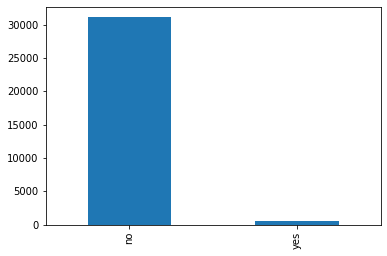

In [151]:
# Default History

# Count 
print(train_data['default'].value_counts())

# Proportion
print('\n', train_data['default'].value_counts()/len(train_data['default']))

# plot 
print('\n', train_data['default'].value_counts().plot(kind='bar'))

More than 90% of the clients have no default history.

In [152]:
train_data.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

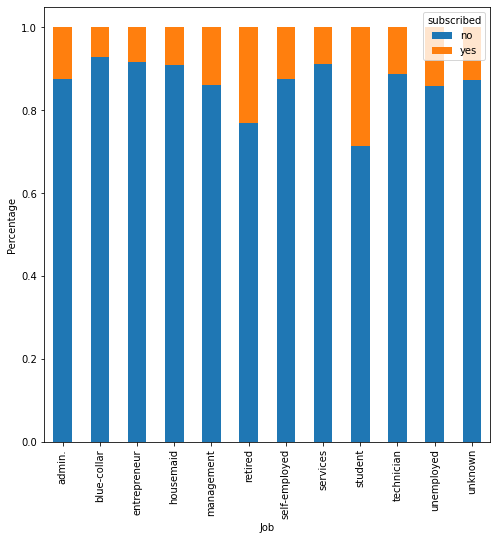

In [153]:
print(pd.crosstab(train_data['job'],train_data['subscribed']))
job=pd.crosstab(train_data['job'],train_data['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar",stacked = True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

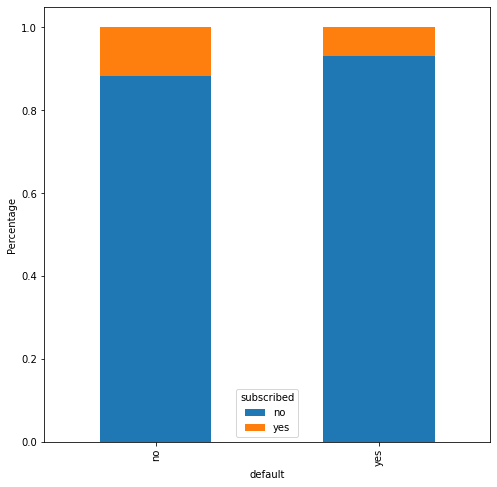

In [154]:
# Subscribed Vs Defalut

print(pd.crosstab(train_data['default'],train_data['subscribed']))

default=pd.crosstab(train_data['default'],train_data['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

Now lets explore relationship b/w our numeric variables. By this we can get an overview of the variables which might affect our target variable

In [155]:
# Target variable into numeric
train_data['subscribed'].replace('no', 0, inplace=True)
train_data['subscribed'].replace('yes',1, inplace=True)

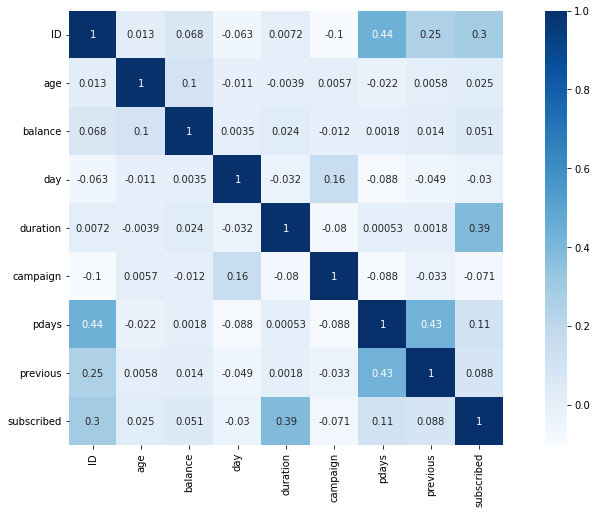

In [156]:
corr = train_data.corr()

fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr,square = True,annot=True, cmap="Blues")

Duration of the call is highly correlated with the target variable. This can be verified as well. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.

In [157]:
# Check missing values 
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [158]:
test_data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no missing values in the train dataset.





Next, we will start to build our predictive model to predict whether a client will subscribe to a term deposit or not.

As the sklearn models takes only numerical input, we will convert the categorical variables into numerical values using dummies. We will remove the ID variables as they are unique values and then apply dummies. We will also remove the target variable and keep it in a separate variable.

# ***Model Building***

In [159]:
# Subscribes is our target varibale
target = train_data['subscribed']
train = train_data.drop('subscribed',axis  = 1)

In [160]:
# applying dummies on the train dataset
train = pd.get_dummies(train)

Now, its time to build our model. We will split the train data into training and validation set so that we will be able to validate the results of our model on the validation set. We will keep 20% data as validation set and rest as the training set.

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
# splitting into train and test with 20% data in validation set and 80% data in train set.
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=12)

Now our data is ready. Its time to build our model and check its performance. **Logistic regression** is used for classification problems and as it is a classification problem let's first build a Logistic Regression model

In [163]:
from sklearn.linear_model import LogisticRegression

In [164]:
# Creat an Logistic Regression object 
log_reg = LogisticRegression()

In [165]:
# fit the model with train data
log_reg.fit(X_train,y_train)

LogisticRegression()

In [166]:
# make prediction on test data 
prediction = log_reg.predict(X_test)

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is accuracy, let's calculate the accuracy on validation set.

In [167]:
# import accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8913112164296998

We got an accuracy score of around 89% on the validation dataset. Logistic regression has a linear decision boundary. What if our data have non linearity? We need a model that can capture this non linearity.



Let's try decision tree algorithm now to check if we get better accuracy with that.

In [168]:
# Create a Decision Tree Classifier Object
from sklearn.tree import DecisionTreeClassifier

In [169]:
clf = DecisionTreeClassifier(max_depth=5, random_state=0)

In [170]:
clf

DecisionTreeClassifier(max_depth=5, random_state=0)

In [171]:
# fitting the decision tree model
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [172]:
# making prediction on the test set
predict = clf.predict(X_test)

In [173]:
# calculating the accuracy score
accuracy_score(y_test, predict)

0.9063191153238547

We got an accuracy of more than 90% on the validation set.

In [174]:
test = pd.get_dummies(test_data)

In [175]:
test_prediction = clf.predict(test)

In [176]:
# First Five results
test_prediction[0:5]

array([0, 1, 0, 0, 0])

 we will save these predictions into a csv file.

In [177]:
submission = pd.DataFrame()

In [178]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [179]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [180]:
submission.to_csv('submission.csv', header=True, index=False)

# **Conclusion**

We Classified People whether they will Subscribe to our *Term Deposit* or not. 

We got 90% Accuracy in our Prediction.